# Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#import sklearn stuff here

In [5]:
df = pd.read_csv('./data/subreddit_posts.csv')

C:\ProgramData\Anaconda3\envs\dsi-111\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,19,84,85,90,92,93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'pinned',
       'post_hint', 'preview', 'pwls', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'suggested_sort'

In [7]:
df['subreddit'].value_counts()

0    8684
1    6182
Name: subreddit, dtype: int64

## Removing Media Only Posts

In [8]:
df['title_len'] = df['title'].str.split().str.len()

In [9]:
df[df['is_video'] == True][['title_len','title']]

,title_len,title
7,18,"In Avengers age of Ultron, Hawkeye finishes ki..."
8,6,Hidden sex scene in Spider-man 2002
32,29,In Spider-Man (2002) director Sam Raimi came a...
304,25,The Dark Knight Rises (2012): Bane nods to one...
368,17,"When Moon Knight punches the bad guy, its just..."
...,...,...
14413,27,"[Planes, Trains &amp; Automobiles] Neil's wife..."
14465,27,In the movie Now You See Me FBI agent Dylan Rh...
14479,28,When Baby's face is seen on the TV for suspect...
14480,30,In 'Baby Driver' when Baby's face is seen on T...


There are media posts that still have titles. We shouldnt filter them out by media content then.

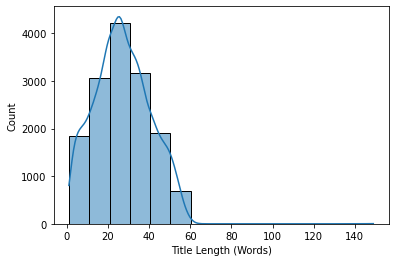

In [10]:
sns.histplot(data = df,
             x = 'title_len',
             kde=True,
            bins=15);

plt.xlabel('Title Length (Words)');

Relatively normally distributed

In [11]:
df[df['title_len'] < 10]['title']

0                             Spider-Man No Way Home leak!
3        Krampus - The Christmas Demon with Horns and C...
8                      Hidden sex scene in Spider-man 2002
19                                       The Santa Clause.
62              That’s some serious commitment to his role
                               ...                        
14838                                    Christopher Cobet
14840                                         Hartmut Czok
14856                      /r/MovieDetails Discord Server!
14857                           LIFE THE HITMANs BODYGUARD
14859                                ALEN CREATURE Trailer
Name: title, Length: 1617, dtype: object

In [12]:
df[df['title_len'] < 10].shape

(1617, 96)

Title with lengths less than 10 tend to be more reliant on media, often only having a title becuase it's required. Will we catch some actual titles? Maybe, but the data will be more usable this way.

In [13]:
df = df[df['title_len'] > 10]

In [14]:
df['removed_by_category'].value_counts()

moderator           863
deleted             270
automod_filtered    185
reddit               78
author                7
Name: removed_by_category, dtype: int64

In [15]:
df = df[df['removed_by_category'].isnull()]

We dont wan't posts that have been removed for whatever reason. Either they break subreddit rules, reddit rules, or for some other reason that may indicate they aren't indicative of what the subreddit is about.

In [16]:
df.shape

(11626, 96)

In [17]:
df[df['title_len']>50][['title','title_len']]

,title,title_len
36,"In Avengers: Endgame (2019), Thor and Korg are...",54
59,"In Iron Man 3 (2013), it is revealed that Pepp...",59
228,In the extended version of Avatar (2009) there...,51
245,"In Ratatouille (2007), the first time we see E...",55
258,In every Ryan Reynolds film in recent history ...,52
...,...,...
14631,"In Batman Begins, a villain from the comics, V...",51
14658,"In Mad Max Fury Road, when Max and Furiosa are...",52
14708,"In Dolores Claiborne, when she is about to sta...",51
14769,"In Gremlins, a photo of character actor Edward...",54


Most of the longer titles seem to still be in theme with the subreddit

In [18]:
df[df['is_created_from_ads_ui']==True]['title']

Series([], Name: title, dtype: object)

There are no posts created from ads ui but if there were we would remove them.

In [19]:
df[df['author_is_blocked']==True]['title']

Series([], Name: title, dtype: object)

In [20]:
df['banned_by'].value_counts()

moderators    10
Name: banned_by, dtype: int64

Assuming this column means blocked from posting, in which case we wouldn't want their posts. Mostly likely caught with when we deleted removed posts but a double check never hurt

In [21]:
df = df[['title','subreddit']]

In [22]:
df

,title,subreddit
1,"In Forrest Gump(1994), Forrest is shown sittin...",1
2,In Suicide Squad (2016) Katana was late for th...,1
4,Spider Man No Way Home: Multiverse Leak. Looks...,1
5,CONFIRMED: The Matrix Resurrections will NOT b...,1
6,They used the Pirate Bay logo as the backgroun...,1
...,...,...
14861,"In Prisoners, Paul Dano’s character is named A...",0
14862,"In ""Men in Black"" when Agent K shows Agent J t...",0
14863,"In La La Land, when Mia decides to go back hom...",0
14864,"In Rogue One: A Star Wars Story, you can see a...",0


In [23]:
df.to_csv('./data/cleaned_posts.csv',index=False)

In [24]:
df[df['subreddit']==1].to_csv('./data/smd_posts.csv',index=False)

In [25]:
df[df['subreddit']==0].to_csv('./data/md_posts.csv',index=False)